In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
 from datetime import datetime as dt

In [3]:
my_year = 2017
my_month =1
my_day = 2
my_hour = 13
my_minute = 20
my_second = 15

In [4]:
my_date = dt(2017, 1, 2, 0, 0)

In [5]:
my_date_time = dt(my_year, my_month, my_day, my_hour, my_minute, my_second)

In [6]:
my_date_time

datetime.datetime(2017, 1, 2, 13, 20, 15)

In [7]:
type(my_date)

datetime.datetime

In [8]:
type(my_date_time)

datetime.datetime

In [9]:
first_two = [dt(2016, 1, 1), dt(2016, 1, 2)]

In [10]:
first_two

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 2, 0, 0)]

In [11]:
type(first_two)

list

In [12]:
dt_ind = pd.DatetimeIndex(first_two)

In [13]:
dt_ind

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [14]:
data = np.random.randn(2, 2)

In [15]:
data

array([[ 1.17266737,  1.69298256],
       [-0.26544011,  1.26924552]])

In [16]:
cols= ['a', 'b']

In [17]:
df = pd.DataFrame(data, index=dt_ind, columns=cols)

In [18]:
df

,a,b
2016-01-01,1.172667,1.692983
2016-01-02,-0.265440,1.269246


In [19]:
 df.index.argmax()

1

In [20]:
df.index.max()

Timestamp('2016-01-02 00:00:00')

# Resampling

In [21]:
df = pd.read_csv('silver_rates.csv', index_col='Date', parse_dates=True)

In [22]:
df.head()

,dAsk_open,dAsk_high,dAsk_low,dAsk_close,dBid_open,dBid_high,dBid_low,dBid_close
Date,,,,,,,,
2020-08-20 14:53:01,31.250120,34.059719,31.250120,33.092663,24.058703,29.033866,23.386813,27.527786
2020-08-20 14:54:01,33.101373,35.544810,33.101373,33.966106,27.680442,29.661571,25.809777,28.331556
2020-08-20 14:55:01,33.512670,35.409447,33.512670,32.731117,27.442044,30.040872,25.757473,26.515337
2020-08-20 14:56:01,32.953497,38.374924,32.953497,36.938822,26.960129,34.502927,26.182525,33.170154
2020-08-20 14:57:01,35.280327,40.091153,35.280327,38.888639,32.502927,36.118225,30.629955,34.707211


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22077 entries, 2020-08-20 14:53:01 to 2020-09-30 15:29:45
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dAsk_open   22077 non-null  float64
 1   dAsk_high   22077 non-null  float64
 2   dAsk_low    22077 non-null  float64
 3   dAsk_close  22077 non-null  float64
 4   dBid_open   22077 non-null  float64
 5   dBid_high   22077 non-null  float64
 6   dBid_low    22077 non-null  float64
 7   dBid_close  22077 non-null  float64
dtypes: float64(8)
memory usage: 1.5 MB


In [24]:
# df['Date'] = pd.to_datetime(df['Date'])
# df['Date'] = df['Date'].apply(pd.to_datetime)

In [25]:
df.resample(rule='3H').mean()

,dAsk_open,dAsk_high,dAsk_low,dAsk_close,dBid_open,dBid_high,dBid_low,dBid_close
Date,,,,,,,,
2020-08-20 12:00:00,34.844231,38.019255,34.844231,36.208967,29.640929,33.201499,27.959599,31.271007
2020-08-20 15:00:00,36.591096,39.415138,36.591096,36.826618,29.732016,32.557460,26.726296,29.953440
2020-08-20 18:00:00,50.440275,54.688804,50.440275,50.637591,44.626024,49.075697,40.961414,44.909409
2020-08-20 21:00:00,39.814060,42.489044,39.814060,39.651191,34.690150,37.433994,31.867674,34.591218
2020-08-21 00:00:00,31.714012,33.595156,31.714012,31.701509,26.649041,28.574963,24.936129,26.615225
...,...,...,...,...,...,...,...,...
2020-09-30 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30 09:00:00,-226.948869,-225.039741,-228.831532,-226.862388,-232.273245,-230.341255,-234.071072,-232.136208


In [26]:
def first_day(entry):
    if type(entry) is type(list):
        return entry

In [27]:
df.resample(rule='3H').apply(first_day)

,dAsk_open,dAsk_high,dAsk_low,dAsk_close,dBid_open,dBid_high,dBid_low,dBid_close
Date,,,,,,,,
2020-08-20 12:00:00,None,None,None,None,None,None,None,None
2020-08-20 15:00:00,None,None,None,None,None,None,None,None
2020-08-20 18:00:00,None,None,None,None,None,None,None,None
2020-08-20 21:00:00,None,None,None,None,None,None,None,None
2020-08-21 00:00:00,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
2020-09-30 03:00:00,None,None,None,None,None,None,None,None
2020-09-30 06:00:00,None,None,None,None,None,None,None,None
2020-09-30 09:00:00,None,None,None,None,None,None,None,None


<IPython.core.display.Javascript object>


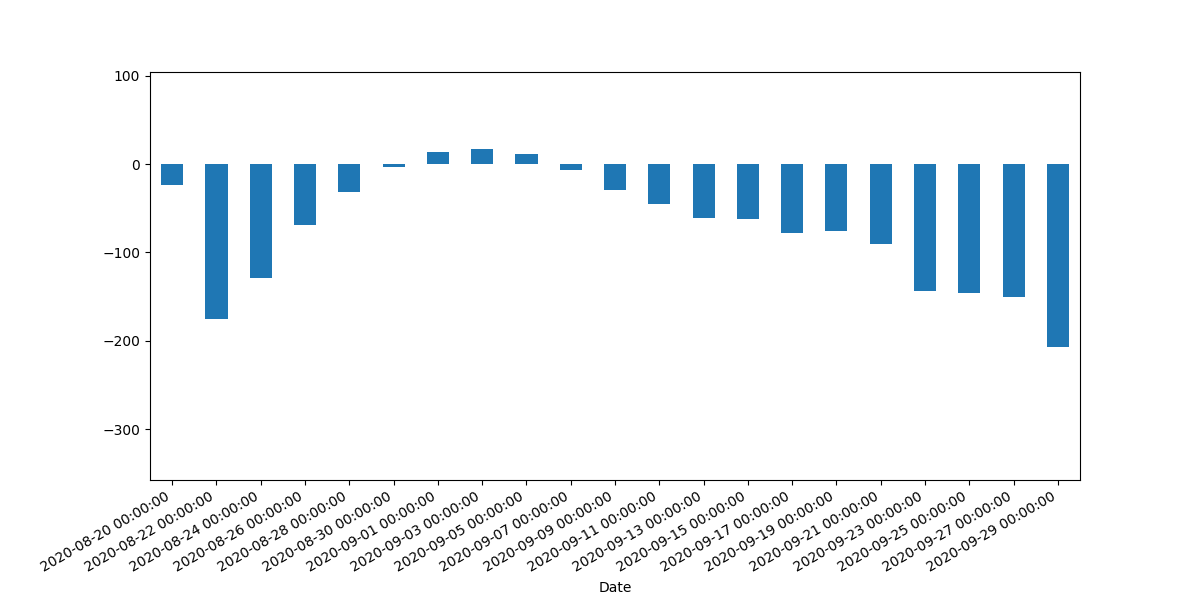

<AxesSubplot:xlabel='Date'>

In [28]:
df['dBid_close'].resample('2D').mean().plot(kind='bar', figsize=(12, 9))

# Time Shift

In [29]:
df.head()

,dAsk_open,dAsk_high,dAsk_low,dAsk_close,dBid_open,dBid_high,dBid_low,dBid_close
Date,,,,,,,,
2020-08-20 14:53:01,31.250120,34.059719,31.250120,33.092663,24.058703,29.033866,23.386813,27.527786
2020-08-20 14:54:01,33.101373,35.544810,33.101373,33.966106,27.680442,29.661571,25.809777,28.331556
2020-08-20 14:55:01,33.512670,35.409447,33.512670,32.731117,27.442044,30.040872,25.757473,26.515337
2020-08-20 14:56:01,32.953497,38.374924,32.953497,36.938822,26.960129,34.502927,26.182525,33.170154
2020-08-20 14:57:01,35.280327,40.091153,35.280327,38.888639,32.502927,36.118225,30.629955,34.707211


In [30]:
df.tail()

,dAsk_open,dAsk_high,dAsk_low,dAsk_close,dBid_open,dBid_high,dBid_low,dBid_close
Date,,,,,,,,
2020-09-30 15:25:45,-189.819567,-186.931951,-192.449672,-188.342037,-196.240383,-192.915087,-198.228605,-194.748284
2020-09-30 15:26:45,-187.480936,-183.198253,-188.952119,-186.499092,-193.948305,-189.566043,-194.443868,-192.466745
2020-09-30 15:27:45,-186.657086,-184.786044,-188.106640,-185.362550,-192.397959,-190.866729,-193.666678,-191.238705
2020-09-30 15:28:45,-185.642743,-185.128182,-191.813965,-191.617835,-191.414513,-191.134252,-196.286645,-196.286645
2020-09-30 15:29:45,-191.648428,-187.964615,-191.898101,-189.069005,-196.309604,-193.486792,-197.023329,-194.575801


In [31]:
df.shift(periods=1).head()

,dAsk_open,dAsk_high,dAsk_low,dAsk_close,dBid_open,dBid_high,dBid_low,dBid_close
Date,,,,,,,,
2020-08-20 14:53:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-20 14:54:01,31.250120,34.059719,31.250120,33.092663,24.058703,29.033866,23.386813,27.527786
2020-08-20 14:55:01,33.101373,35.544810,33.101373,33.966106,27.680442,29.661571,25.809777,28.331556
2020-08-20 14:56:01,33.512670,35.409447,33.512670,32.731117,27.442044,30.040872,25.757473,26.515337
2020-08-20 14:57:01,32.953497,38.374924,32.953497,36.938822,26.960129,34.502927,26.182525,33.170154


In [32]:
df.tshift(freq='3H').head()

<ipython-input-32-5818ed78a47f>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(freq='3H').head()


,dAsk_open,dAsk_high,dAsk_low,dAsk_close,dBid_open,dBid_high,dBid_low,dBid_close
Date,,,,,,,,
2020-08-20 17:53:01,31.250120,34.059719,31.250120,33.092663,24.058703,29.033866,23.386813,27.527786
2020-08-20 17:54:01,33.101373,35.544810,33.101373,33.966106,27.680442,29.661571,25.809777,28.331556
2020-08-20 17:55:01,33.512670,35.409447,33.512670,32.731117,27.442044,30.040872,25.757473,26.515337
2020-08-20 17:56:01,32.953497,38.374924,32.953497,36.938822,26.960129,34.502927,26.182525,33.170154
2020-08-20 17:57:01,35.280327,40.091153,35.280327,38.888639,32.502927,36.118225,30.629955,34.707211


<AxesSubplot:xlabel='Date'>

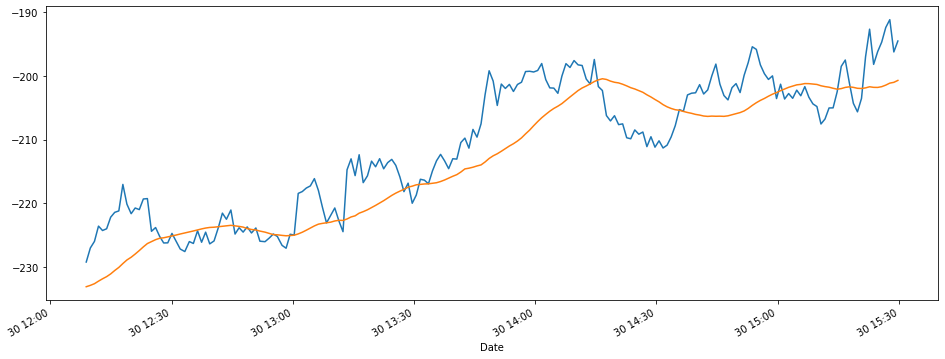

In [50]:
df['dBid_close'].tail(200).plot(figsize=(16,  6))
df['30 MA'] = df['dBid_close'].rolling(window=30).mean()
df['30 MA'].tail(200).plot()

<AxesSubplot:xlabel='Date'>

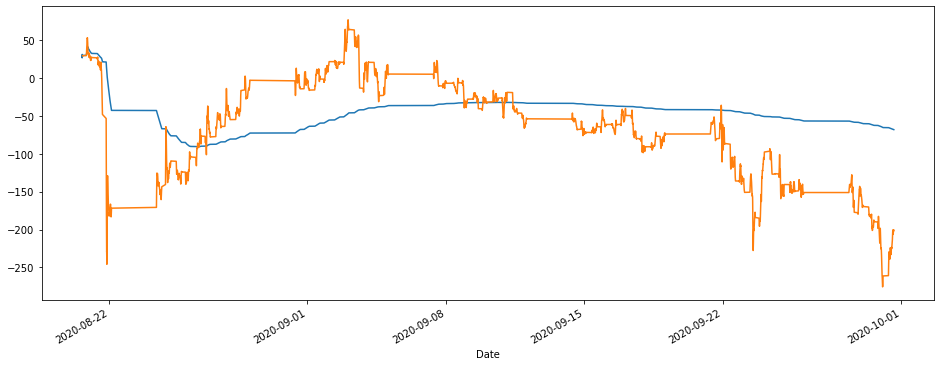

In [45]:
df['dBid_close'].expanding().mean().plot(figsize=(16, 6))
df['30 MA'].plot()

# Bollinger Bands

<AxesSubplot:xlabel='Date'>

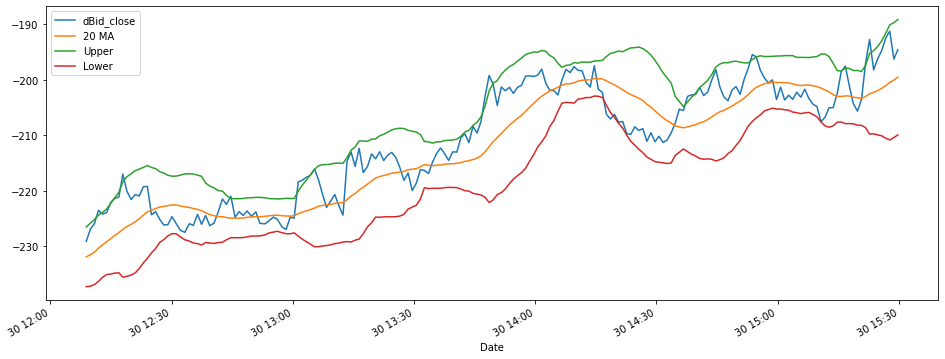

In [48]:
# Close 20 MA
df['20 MA'] = df['dBid_close'].rolling(20).mean()

# Upper = 20 MA + 2 * std(20)
df['Upper'] = df['20 MA'] + 2 * (df['dBid_close'].rolling(20).std())

# Lower = 20MA - 2 * std(20)
df['Lower'] = df['20 MA'] - 2 * (df['dBid_close'].rolling(20).std())

# Close
df[['dBid_close', '20 MA', 'Upper', 'Lower']].tail(200).plot(figsize=(16, 6))